# Неделя 2. Визуализация на карте и чуть-чуть пространственного анализа
То, что вы видите перед собой - это **Jupyter Notebook**, такой специальный интерактивный блокнот, который содержит и текст с оформлением и фрагменты кода, при запуске любого из которых под ним появится блок с результатами выполнения.
Почитать подробнее об этой технологии можно вот здесь: https://webdevblog.ru/jupyter-notebook-dlya-nachinajushhih-uchebnik/
В строке браузера вы видите адрес jupyter-сервера, который настроен для выполнения этих заданий. Однако, если у вас есть потребность, вы можете загрузить сам файл с расширением .ipynb и в другие программы и веб-сервисы для работы с таким форматом. Выполнение заданий возможно в любой удобной вам среде.

## Подготовительные действия
### Установка библиотек
Для выполнения этой работы нам потребуется несколько библиотек. Часть из них взаимосвязана, поэтому устанавливаются они в конкретный каталог, для того, чтобы потом правильно отрабатывал импорт.

In [ ]:
!/opt/tljh/user/bin/pip install numpy

/bin/bash: line 1: /opt/tljh/user/bin/pip: No such file or directory


In [ ]:
!/opt/tljh/user/bin/pip install branca

/bin/bash: line 1: /opt/tljh/user/bin/pip: No such file or directory


In [ ]:
!/opt/tljh/user/bin/pip install folium

/bin/bash: line 1: /opt/tljh/user/bin/pip: No such file or directory


In [ ]:
!/opt/tljh/user/bin/pip install shapely

/bin/bash: line 1: /opt/tljh/user/bin/pip: No such file or directory


In [ ]:
!/opt/tljh/user/bin/pip install geopy

/bin/bash: line 1: /opt/tljh/user/bin/pip: No such file or directory


## Знакомимся с библиотеками
### Попробуем поработать с картой
Folium — это мощная библиотека визуализации данных в Python, которая была создана в первую очередь для того, чтобы помочь людям визуализировать гео-пространственные данные.
Создание карты мира с помощью Folium довольно просто. Вы просто вызываете функцию карты - `folium.Map()`, и это все.

Для фокусирования карты мы передаем значения желаемых широты и долготы с помощью параметра `location` (местоположения) и можно установить начальный уровень масштабирования с помощью параметра `zoom_start`.
Параметр `tiles` даёт возможность задать подложку карты.
Сейчас выбрана подложка `Cartodb Positron`, но попробуйте также варианты `OpenStreetMap`, `Cartodb dark_matter`.

А `control_scale` включает/выключает элемент интерфеса, позволяющий управлять масштабом уже созданной карты с помощью кнопок + и -.

Для вывода на карте точек мы можем использовать `folium.Marker` и `folium.CircleMarker`. Для их размещения достаточно указать координаты одной точки в параметре `location`. Для линейных и площадных объектов аналогом будет параметр `locations` в котором указывается массив точек или массив массивов точек.
Для всех добавленных объектов мы можем указать в `tooltip` текст подсказки, который будет показан при наведении на объект. А в параметре `popup` текст, который откроется при нажатии.

Подробные инструкции и другие параметры можно изучить по ссылке: https://python-visualization.github.io/folium/latest/user_guide/map.html

In [ ]:
import folium

m1 = folium.Map(location=[59.93, 30.33], control_scale=True,
                tiles='Cartodb Positron',
                zoom_start=13)
m1.add_child(
    folium.LatLngPopup()
)
folium.Marker(
    location=[59.94, 30.35],
    popup='<i>Здесь был Вася</i>',
    tooltip='Метка 1').add_to(m1) # попробуйте добавить: icon=folium.Icon(icon="cloud")

folium.Marker(
    location=[59.92, 30.32],
    popup='<b>Хорошее кафе</b>',
    tooltip='Метка 2',
    icon=folium.Icon(color="green")).add_to(m1) # подкрасили метку на карте

folium.CircleMarker(
    location=[59.93, 30.33],
    radius=50,
    popup="Апраксин двор",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m1)

locations = [
    [
    [59.9262, 30.3495],
    [59.9218, 30.3431],
    [59.9267, 30.3468],
    [59.9295, 30.3424],
    [59.9287, 30.3491],
],
    [
    [59.9100, 30.3400],
    [59.9115, 30.3400],
    [59.9115, 30.3430],
    [59.9100, 30.3430],
    ]
]

folium.Polygon(
    locations=locations,
    color="blue",
    weight=2,
    fill_color="red",
    fill_opacity=0.5,
    fill=True,
    popup="Тестовый полигон",
    tooltip="Кликни!",
).add_to(m1)

m1

### База пространственного анализа: пересечение и вхождение
Shapely – это библиотека для работы с планарными геометрическими объектами. Она предоставляет функционал для создания, анализа и манипуляции с геометрией объектов.
Во фрагменте кода ниже можно посмотреть, как проверить вхождение точки в полигон, и как проверить пересечение объектов.

Почитать еще:
- https://pypi.org/project/shapely/
- https://shapely.readthedocs.io/en/stable/manual.html

In [ ]:
import shapely
import numpy as np
from shapely import Point
from shapely import Polygon

point1 = Point(59.92705, 30.347)
geoms = np.array([point1, Point(59.91, 30.31), Point(59.92, 30.32)])

polygon1= Polygon([[59.9262, 30.3495],
    [59.9218, 30.3431],
    [59.9267, 30.3468],
    [59.9295, 30.3424],
    [59.9287, 30.3491]])
polygon3= Polygon([[59.9100, 30.3400],
    [59.9115, 30.3400],
    [59.9115, 30.3430],
    [59.9100, 30.3430]])
a = shapely.contains(polygon1, geoms)

b = shapely.intersects(polygon1, polygon3)
s = "Вхождение точек: "+str(shapely.contains(polygon1, point1)) + "; Пересечение полигонов: "+str(b)+"; площадь: "+str(round(polygon1.area, 9))
s


'Вхождение точек: True; Пересечение полигонов: False; площадь: 1.8435e-05'

### Измерение расстояний
Модуль shapely всем прекрасен, но работает он с геометрией. И несмотря на то, что там можно запросить длину ломаной или площадь полигона, что нам это даст, если координаты даны в градусах?
Однако мы можем импортировать модуль для подсчета расстояния geopy.distance, для того чтобы считать расстояния в километрах, подавая на вход координаты точек в градусах.
Почитать подробнее можно вот тут: https://geopy.readthedocs.io/en/stable/#module-geopy.distance

In [ ]:
from shapely import wkt
from geopy.distance import geodesic as GD

geom_objects = wkt.loads('''GEOMETRYCOLLECTION(
POINT (37.630853 55.752417),
POINT (37.632097 55.749784),
POINT (37.625382 55.749917),
LINESTRING (37.63347 55.753504, 37.632333 55.749567, 37.628407 55.749796, 37.624438 55.749676, 37.624138 55.752212),
LINESTRING (37.622486 55.753311, 37.621284 55.752441, 37.618688 55.750835, 37.618023 55.750002, 37.614762 55.749338, 37.614461 55.750533, 37.615148 55.752175, 37.612573 55.75255),
POLYGON ((37.616497 55.755134, 37.617741 55.754506, 37.616969 55.753419, 37.615467 55.753733, 37.616497 55.755134)),
POLYGON ((37.636453 55.750509, 37.634394 55.751064, 37.6336 55.750219, 37.635745 55.749639, 37.636453 55.750509)))''')
print("Если считать длину 3 линии напрямую: "+str(geom_objects.geoms[3].length))
print("Расстояние (в км) от 0 до 1 точки: "+str(GD(geom_objects.geoms[0].coords,geom_objects.geoms[1].coords).km))
len = 0.0
for coord in geom_objects.geoms[3].coords:
    num = list(geom_objects.geoms[3].coords).index(coord)
    if num > 0:
        len = len + GD(geom_objects.geoms[3].coords[num - 1], coord).km
print("Длина линии 3 (в км): "+str(len))

Если считать длину 3 линии напрямую: 0.014555063822207528
Расстояние (в км) от 0 до 1 точки: 0.27033403405999173
Длина линии 3 (в км): 1.4729117965700167


## Приступим!
### Генерация исходных данных
Следующая команда создаёт файл `geom.wkt` с некоторым случайным набором геометрических объектов (точек, ломаных и полигонов). Он понадобится для выполнения задания.

In [8]:
!python createGeom.py

Посмотрим, что получилось:

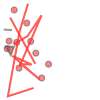

In [9]:
from shapely import wkt
file_wkt = open('geom.wkt', 'r')
geom_objects = wkt.loads(file_wkt.read())
geom_objects


### Маленький пространственный анализ
Проведем проверки вхождений и пересечений для созданного набора объектов.

In [10]:
import shapely
from shapely import wkt
from shapely import Point
from shapely import Polygon
from shapely import LineString
file_wkt = open('geom.wkt', 'r')
geom_objects = wkt.loads(file_wkt.read())
file_wkt.close()
file_html = open("input_and_SA.html", "w")
page = '''<html>
<body>
<p> Исходные данные (в формате wkt):'''
page = page + str(geom_objects.wkt) + '</p><br/>'
page = page + '<ul>'
for geom in geom_objects.geoms:
    number_geom = list(geom_objects.geoms).index(geom)
    str_type = ""
    if type(geom) == Polygon:
        str_type = "Полигон "
    if type(geom) == LineString:
        str_type = "Ломаная "
    if type(geom) == Point:
        str_type = "Точка "

    for another_geom in geom_objects.geoms:
        number_geom_2 = list(geom_objects.geoms).index(another_geom)
        if (number_geom < number_geom_2):
            if (type(geom)!= Point and type(another_geom) != Point and shapely.intersects(geom, another_geom)):
                p1 = (str_type+str(number_geom)+" пересекается с объектом "+str(number_geom_2))
                page = page + '<li>'+p1+'</li>'
                print(p1)
            if (type(geom) == Point and type(another_geom) == Polygon and shapely.contains(another_geom, geom)):
                p2 = (str_type+str(number_geom)+" входит в полигон "+str(number_geom_2))
                page = page + '<li>'+p2+'</li>'
                print(p2)
page = page + '</ul>'
page = page + ('''
</body>
</html>''')
file_html.write(page)
file_html.close()

Точка 8 входит в полигон 15
Ломаная 10 пересекается с объектом 11
Ломаная 10 пересекается с объектом 12
Ломаная 10 пересекается с объектом 13
Ломаная 11 пересекается с объектом 13
Ломаная 12 пересекается с объектом 13


### Вывод на карте
Посмотрим на карте на эти объекты.

In [15]:
from shapely import wkt
from shapely import Point
from shapely import Polygon
from shapely import LineString
import folium
import numpy as np
m1 = folium.Map(location=[58.523139,31.268882], control_scale=True,
                tiles='Cartodb Positron',
                zoom_start=11)

file_wkt = open('geom.wkt', 'r')
geom_objects = wkt.loads(file_wkt.read())
for geom in geom_objects.geoms:
    number_geom = list(geom_objects.geoms).index(geom)
    if type(geom) == Polygon:
        folium.Polygon(
            locations=np.array(geom.exterior.coords),
            color="blue",
            weight=2,
            fill_color="white",
            fill=True,
            popup="Полигон "+str(number_geom),
            tooltip=str(number_geom),
        ).add_to(m1)
    if type(geom) == LineString:
        folium.PolyLine(
            locations=np.array(geom.coords),
            color="gray",
            weight=2,
            popup="Ломаная "+str(number_geom),
            tooltip=str(number_geom),
        ).add_to(m1)
    if type(geom) == Point:
        folium.Marker(
            location=np.array(geom.coords),
            color="red",
            fill=True,
            popup="Точка "+str(number_geom),
            tooltip=str(number_geom),
        ).add_to(m1)
m1.save("map.html")
m1


## Задание
1. Во фрагменте кода ниже добавьте свои ФИО и группу в теге `<h2>`
2. Заглянуть в файл `createGeom.py`, ознакомиться с алгоритмом и в последней строке указать другие исходные координаты `startX` и `startY` - выберите точку недалеко от вашего местоположения. При желании можно изменить и параметр `delta`;
3. Обновить код в разделе "Маленький пространственный анализ" так, чтобы в результат указывались типы обоих объектов (сейчас только у первого).
4. Обновить центр `location` и масштаб `zoom_start` карты `folium.Map`, так чтобы объекты были хорошо видны. Обновить код в разделе "Вывод на карте" так, чтобы у всех объектов выводились обозначения: только номер (при наведении) и тип с номером (при клике). Сейчас это реализовано только для полигонов, нужно по аналогии добавить для ломаных и точек.
5. Не забудьте после всех изменений перезапустить код ниже: он соберет все результаты в отчет. Сохраните файл `result_2.html` и приложите его в СДО как ответ на Задание №2.

In [17]:
file_html = open("result_2.html", "w")
page = ('''<html>
<body>
<h1>Отчет за 2 неделю ознакомительной практики по разработке программного обеспечения геосервиса</h1>
 <h2>Выполнила: Сивец Р.И. группа 2024-ФГиИБ-ИС-2см</h2>''')
with open('input_and_SA.html', 'r', encoding='utf-8') as f1:
    data1 = f1.readlines()
for str1 in data1:
    page = page + str1
with open('map.html', 'r', encoding='utf-8') as f2:
    data2 = f2.readlines()
for str2 in data2:
    page = page + str2
page = page + ('''
</body>
</html>''')
file_html.write(page)
file_html.close()